In [1]:
from binance_f.requestclient import RequestClient
from binance_f.constant.test import *
from binance_f.base.printobject import *
from binance_f.model import *
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white')

In [2]:
def timeStamp(timeNum): 
    timeStamp = float(timeNum/1000) 
    timeArray = time.localtime(timeStamp) 
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime
def json_to_df(obj):
    df = pd.DataFrame(t.__dict__ for t in obj)
    df['timestamp'] = df['timestamp'].apply(lambda x :timeStamp(int(x))).astype('datetime64[ns]')
    df.set_index('timestamp', inplace=True)
    return df
def dt2ts(dt: str):
    timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")
    timestamp = time.mktime(timeArray)
    return int(timestamp*1000)

In [3]:
request_client = RequestClient()
limit=500
top_long_short_positions = request_client.get_top_long_short_positions(symbol='ETHUSDT', period='2h', limit=limit)
global_long_short_accounts = request_client.get_global_long_short_accounts(symbol='ETHUSDT', period='2h', limit=limit)
# 2021-11-10 04:00:00 ~ 2021-11-11 115:00:00
kcandlestick = request_client.get_candlestick_data(symbol="ETHUSDT", interval=CandlestickInterval.HOUR2,
                                             startTime=None, endTime=1636710772786000, limit=limit)

In [4]:
df = json_to_df(top_long_short_positions)
df2 = json_to_df(global_long_short_accounts)
df3 = pd.DataFrame(t.__dict__ for t in kcandlestick)
df3[['openTime','closeTime']] = df3[['openTime','closeTime']].applymap(lambda x :timeStamp(int(x+1))).astype('datetime64[ns]')
df3[df3.select_dtypes(include='object').columns] = df3[df3.select_dtypes(include='object').columns].astype('float32')
df3.set_index('closeTime',inplace=True)

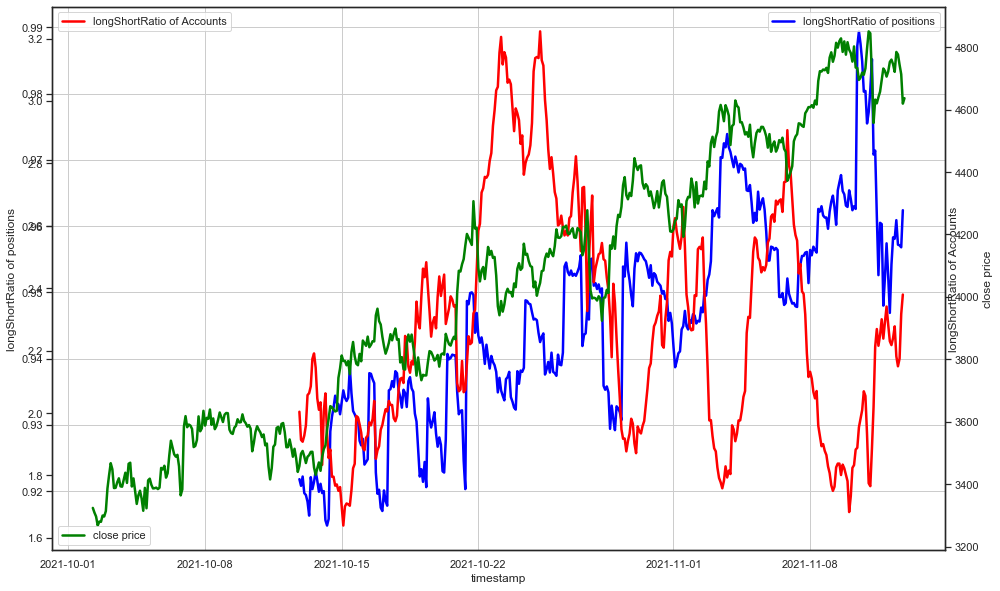

In [5]:

f, ax1 = plt.subplots(figsize=(16,10))
ax1.grid(True)
ax2 = ax1.twinx()
ax3 = ax2.twinx()
sns.lineplot(data=df['longShortRatio'],  palette='tab10',color='blue', ax=ax1, linewidth=2.5,label='longShortRatio of positions')
sns.lineplot(data=df2['longShortRatio'], palette='tab10',color='red', ax=ax2, linewidth=2.5,label='longShortRatio of Accounts')
sns.lineplot(data=df3['close'], palette='tab10',color='green', ax=ax3, linewidth=2.5,label='close price')
ax1.legend(loc=1)
ax2.legend(loc=2)
ax3.legend(loc=3)
ax1.set_ylabel('longShortRatio of positions')
ax2.set_ylabel('longShortRatio of Accounts')
ax3.set_ylabel('close price')
plt.show()

In [140]:
df3.tail(10)

,openTime,open,high,low,close,volume,quoteAssetVolume,numTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore
closeTime,,,,,,,,,,,
2021-11-12 02:00:00,2021-11-12 00:00:00,4722.060059,4783.120117,4717.100098,4752.819824,96192.132812,457647328.0,160617,47158.707031,224369984.0,0.0
2021-11-12 04:00:00,2021-11-12 02:00:00,4752.669922,4763.689941,4721.330078,4760.470215,58976.218750,279839712.0,105699,31035.605469,147282368.0,0.0
2021-11-12 06:00:00,2021-11-12 04:00:00,4760.609863,4779.569824,4731.720215,4745.520020,58279.820312,276927808.0,94680,30297.009766,144017280.0,0.0
2021-11-12 08:00:00,2021-11-12 06:00:00,4745.640137,4764.620117,4714.229980,4721.189941,50013.937500,236903264.0,96073,21163.654297,100259216.0,0.0
2021-11-12 10:00:00,2021-11-12 08:00:00,4721.189941,4792.270020,4691.000000,4785.000000,131872.468750,625035328.0,199488,67084.468750,318092096.0,0.0
2021-11-12 12:00:00,2021-11-12 10:00:00,4785.009766,4811.000000,4763.410156,4776.850098,93235.546875,446402048.0,152957,44301.816406,212105376.0,0.0
2021-11-12 14:00:00,2021-11-12 12:00:00,4776.839844,4788.470215,4741.020020,4743.600098,56056.906250,267182832.0,111475,27867.703125,132840896.0,0.0
2021-11-12 16:00:00,2021-11-12 14:00:00,4743.609863,4754.560059,4695.000000,4713.540039,87419.187500,412859232.0,154899,38957.394531,184034368.0,0.0
2021-11-12 18:00:00,2021-11-12 16:00:00,4713.549805,4741.069824,4610.209961,4619.350098,197420.281250,924033984.0,272398,90592.406250,424168992.0,0.0
